In [1]:
import requests
import json
import pandas as pd

# API URL
api_url = "http://jsonkeeper.com/b/LLQT"  # Replace with your actual API URL

# Fetch data from the API, bypassing SSL verification
try:
    response = requests.get(api_url, verify=False)  # Disable SSL verification
    response.raise_for_status()
    data = response.json()
    print("Data fetched successfully!")
except requests.exceptions.RequestException as e:
    print(f"Error fetching data: {e}")
    exit()

# Process and save data as before (code unchanged from earlier)

# Check if 'data' is populated
if not data:
    print("No data received from the API.")
    exit()

# Extract quiz metadata
quiz_data = data.get("quiz", {})
if not quiz_data:
    print("No quiz data found.")
    exit()

quiz_id = quiz_data.get("id", "N/A")
quiz_title = quiz_data.get("title", "No Title")
quiz_topic = quiz_data.get("topic", "No Topic")
is_published = quiz_data.get("is_published", False)

print(f"Quiz ID: {quiz_id}")
print(f"Quiz Title: {quiz_title}")
print(f"Topic: {quiz_topic}")
print(f"Published: {is_published}\n")

# Process questions and options dynamically
questions = quiz_data.get("questions", [])
if not questions:
    print("No questions found.")
    exit()

all_questions = []

for question in questions:
    question_id = question.get("id", "Unknown")
    question_description = question.get("description", "No Description")
    options = question.get("options", [])

    for option in options:
        option_id = option.get("id", "Unknown")
        option_text = option.get("description", "No Description")
        is_correct = option.get("is_correct", False)

        # Store all data in a list for saving
        all_questions.append({
            "Quiz ID": quiz_id,
            "Quiz Title": quiz_title,
            "Question ID": question_id,
            "Question Description": question_description,
            "Option ID": option_id,
            "Option Text": option_text,
            "Is Correct": is_correct
        })

# Convert to DataFrame and Save Locally
df = pd.DataFrame(all_questions)
output_file = "quiz_data.csv"
df.to_csv(output_file, index=False)
print(f"Data saved to {output_file}")


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'jsonkeeper.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Data fetched successfully!
Quiz ID: 43
Quiz Title: Structural Organisation in Animals and Plants (7)
Topic: Structural Organisation in Animals
Published: True

Data saved to quiz_data.csv


In [5]:
import requests

# API URL for Quiz Submission Data
submission_api_url = "https://api.jsonserve.com/rJvd7g"  # Replace with your actual API URL

# Fetch data from the API
try:
    response = requests.get(submission_api_url)
    response.raise_for_status()  # Raise an error for failed requests
    submission_data = response.json()  # Parse JSON response
    print("Quiz Submission Data fetched successfully!")
except requests.exceptions.RequestException as e:
    print(f"Error fetching data: {e}")
    exit()

# Check if data is present
if not submission_data:
    print("No data received from the API.")
    exit()

# Extract metadata
submission_id = submission_data.get("id", "N/A")
quiz_id = submission_data.get("quiz_id", "N/A")
user_id = submission_data.get("user_id", "N/A")
score = submission_data.get("score", 0)
accuracy = submission_data.get("accuracy", "N/A")
negative_score = submission_data.get("negative_score", 0.0)
correct_answers = submission_data.get("correct_answers", 0)
incorrect_answers = submission_data.get("incorrect_answers", 0)
total_questions = submission_data.get("total_questions", 0)
rank_text = submission_data.get("rank_text", "N/A")
response_map = submission_data.get("response_map", {})

# Print metadata
print(f"Submission ID: {submission_id}")
print(f"Quiz ID: {quiz_id}")
print(f"User ID: {user_id}")
print(f"Score: {score}")
print(f"Accuracy: {accuracy}")
print(f"Negative Score: {negative_score}")
print(f"Correct Answers: {correct_answers}")
print(f"Incorrect Answers: {incorrect_answers}")
print(f"Total Questions: {total_questions}")
print(f"Rank Text: {rank_text}\n")

# Process and print response_map (if available)
if response_map:
    print("Response Map:")
    for question_id, selected_option_id in response_map.items():
        print(f"  Question ID: {question_id}, Selected Option ID: {selected_option_id}")
else:
    print("No response map available.")


Quiz Submission Data fetched successfully!
Submission ID: 336566
Quiz ID: 43
User ID: 7ZXdz3zHuNcdg9agb5YpaOGLQqw2
Score: 32
Accuracy: 80 %
Negative Score: 2.0
Correct Answers: 8
Incorrect Answers: 2
Total Questions: 128
Rank Text: Topic Rank - #2402

Response Map:
  Question ID: 1837, Selected Option ID: 7363
  Question ID: 1848, Selected Option ID: 7407
  Question ID: 1852, Selected Option ID: 7423
  Question ID: 1862, Selected Option ID: 7464
  Question ID: 1877, Selected Option ID: 7525
  Question ID: 1878, Selected Option ID: 7529
  Question ID: 1900, Selected Option ID: 7617
  Question ID: 1917, Selected Option ID: 7685
  Question ID: 1934, Selected Option ID: 7750
  Question ID: 1964, Selected Option ID: 7872


In [25]:
import requests
import pandas as pd

# API URL for the last 5 quizzes
endpoint_api_url = "https://api.jsonserve.com/XgAgFJ"  # Replace with your actual API URL

# Fetch data from the API
try:
    response = requests.get(endpoint_api_url)
    response.raise_for_status()  # Raise an error for failed requests
    quizzes_data = response.json()  # Parse JSON response
    print("Last 5 Quizzes Data fetched successfully!")
except requests.exceptions.RequestException as e:
    print(f"Error fetching data: {e}")
    exit()

# Check if data is present
if not quizzes_data:
    print("No data received from the API.")
    exit()

# Extract data dynamically and prepare for export
all_quizzes = []
for quiz_submission in quizzes_data:
    submission_id = quiz_submission.get("id", "N/A")
    quiz_id = quiz_submission.get("quiz_id", "N/A")
    user_id = quiz_submission.get("user_id", "N/A")
    score = quiz_submission.get("score", 0)
    accuracy = quiz_submission.get("accuracy", "N/A")
    negative_score = quiz_submission.get("negative_score", 0.0)
    correct_answers = quiz_submission.get("correct_answers", 0)
    incorrect_answers = quiz_submission.get("incorrect_answers", 0)
    total_questions = quiz_submission.get("total_questions", 0)
    rank_text = quiz_submission.get("rank_text", "N/A")
    better_than = quiz_submission.get("better_than", 0)
    response_map = quiz_submission.get("response_map", {})
    quiz_metadata = quiz_submission.get("quiz", {})
    
    # Extract nested quiz metadata
    quiz_title = quiz_metadata.get("title", "N/A")
    quiz_topic = quiz_metadata.get("topic", "N/A")
    quiz_questions_count = quiz_metadata.get("questions_count", 0)
    
    # Convert correct answer marks to float to ensure calculation
    quiz_correct_marks = float(quiz_metadata.get("correct_answer_marks", 0.0))
    quiz_negative_marks = quiz_metadata.get("negative_marks", 0.0)
    
    # Calculate percentage score for each quiz
    if quiz_correct_marks != 0:  # Prevent division by zero
        percentage_score = (score / (total_questions * quiz_correct_marks)) * 100
    else:
        percentage_score = 0.0
    
    # Prepare a dictionary for each submission
    all_quizzes.append({
        "Submission ID": submission_id,
        "Quiz ID": quiz_id,
        "User ID": user_id,
        "Score": score,
        "Accuracy": accuracy,
        "Negative Score": negative_score,
        "Correct Answers": correct_answers,
        "Incorrect Answers": incorrect_answers,
        "Total Questions": total_questions,
        "Rank Text": rank_text,
        "Better Than": better_than,
        "Quiz Title": quiz_title,
        "Quiz Topic": quiz_topic,
        "Questions Count": quiz_questions_count,
        "Marks for Correct Answer": quiz_correct_marks,
        "Negative Marks": quiz_negative_marks,
        "Percentage Score": percentage_score
    })

# Convert to DataFrame and save to CSV
quizzes_df = pd.DataFrame(all_quizzes)
output_file = "API_Endpoint_data_with_difficulty.csv"
quizzes_df.to_csv(output_file, index=False)
print(f"Data for the last 5 quizzes has been saved to {output_file}.")


Last 5 Quizzes Data fetched successfully!
Data for the last 5 quizzes has been saved to API_Endpoint_data_with_difficulty.csv.


/var/folders/0g/500smmy13yz_pjttpcdxzp040000gn/T/ipykernel_78196/776769488.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=topic_performance, x='Quiz Topic', y='Percentage', palette="viridis")


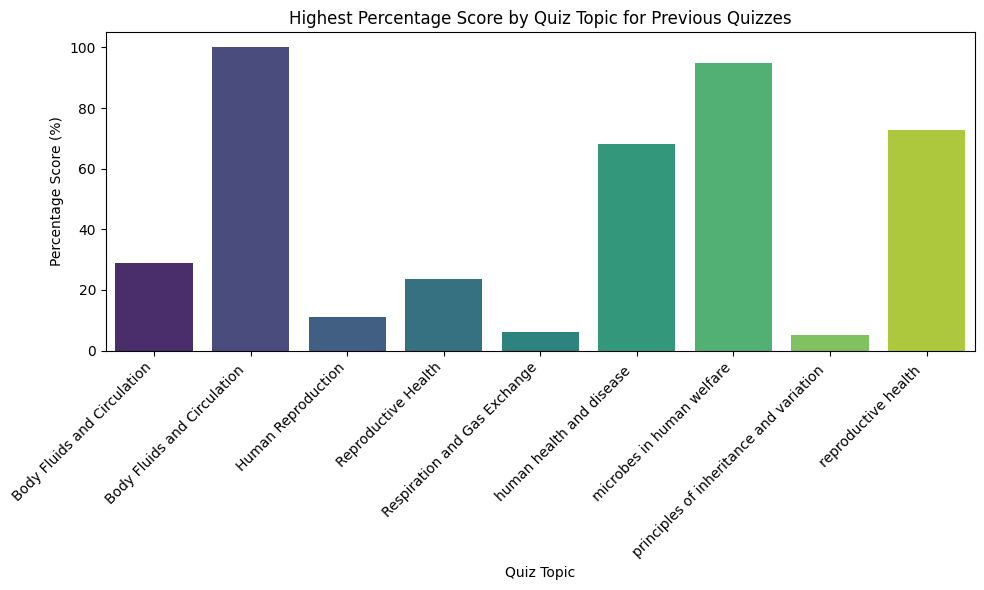

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the last 5 quizzes data
df = pd.read_csv("API_Endpoint_data.csv")

# Ensure proper data types for analysis
df['Accuracy'] = df['Accuracy'].str.rstrip('%').astype(float)  # Convert accuracy from string to float

# Calculate the percentage score for each quiz
df['Percentage'] = (df['Score'] / (df['Total Questions'] * df['Marks for Correct Answer'])) * 100

# Select the highest percentage score for each topic
highest_percentage_scores = df.loc[df.groupby("Quiz Topic")["Percentage"].idxmax()]

# Add the percentage column to the original CSV (if needed)
df.to_csv("API_Endpoint_data_with_percentage.csv", index=False)

# Prepare data for visualization
topic_performance = highest_percentage_scores[["Quiz Topic", "Percentage"]]

# Visualize: Highest Percentage Score by Quiz Topic
plt.figure(figsize=(10, 6))
sns.barplot(data=topic_performance, x='Quiz Topic', y='Percentage', palette="viridis")
plt.title('Highest Percentage Score by Quiz Topic for Previous Quizzes')
plt.xlabel('Quiz Topic')
plt.ylabel('Percentage Score (%)')
plt.xticks(rotation=45, ha="right")  # Improved readability
plt.tight_layout() 
plt.show()


In [91]:
import pandas as pd

# Load the data from the CSV file
df = pd.read_csv("API_Endpoint_data_with_difficulty.csv")

# Strip any leading or trailing spaces from column names
df.columns = df.columns.str.strip()

# Check if 'Better Than' exists in the columns
if 'Better Than' not in df.columns:
    print("Column 'Better Than' is missing from the data.")
    # Optionally, assign a default value to 'Better Than' if missing
    df['Better Than'] = 50  # Assigning a default value of 50% for missing data

# Now, proceed with difficulty calculation
def calculate_difficulty(row):
    # Set weights
    w1 = 0.20  # Weight for performance among peers (Better Than)
    w2 = 0.60  # Weight for percentage score
    w3 = 0.10  # Weight for negative score
    w4 = 0.10  # Weight for marks per correct answer

    # Calculate performance among peers using the formula rank / (rank + better_than)
    try:
        rank = int(row["Rank Text"].split('#')[-1])  # Extract and convert rank to integer
    except ValueError:
        rank = 10000  # Default to high value if rank is not valid (fallback value)

    better_than = row["Better Than"] if row["Better Than"] > 0 else 50  # Default 50% if missing

    # Calculate performance among peers
    performance_among_peers = rank / (rank + better_than)

    # Invert percentage score (because higher percentage means easier)
    inverted_percentage_score = 100 - row["Percentage Score"]

    # Difficulty calculation
    difficulty_score = (w1 * performance_among_peers) + (w2 * inverted_percentage_score) + (w3 * row["Negative Score"]) + (w4 * row["Marks for Correct Answer"])
    return difficulty_score

# Apply the function to calculate difficulty score for each submission
df['Difficulty Score'] = df.apply(calculate_difficulty, axis=1)

# Define difficulty levels based on the difficulty score
def categorize_difficulty(difficulty_score):
    if difficulty_score < 30:
        return 'Easy'
    elif difficulty_score < 50:
        return 'Medium'
    else:
        return 'Hard'

# Apply the categorization function
df['Difficulty Level'] = df['Difficulty Score'].apply(categorize_difficulty)

# Save the result to a new CSV file
output_file = "quiz_submission_with_difficulty_level.csv"
df.to_csv(output_file, index=False)

# Display the first few rows of the updated data
print(df[['Submission ID', 'Quiz Title', 'Quiz Topic', 'Percentage Score', 'Difficulty Level']].head())


   Submission ID             Quiz Title                    Quiz Topic  \
0         336497  Human Physiology (15)   Body Fluids and Circulation   
1         336448   Human Physiology PYQ  Body Fluids and Circulation    
2         333330  Human Physiology (15)   Body Fluids and Circulation   
3         333242   Human Physiology PYQ  Body Fluids and Circulation    
4         329504  Human Physiology (15)   Body Fluids and Circulation   

   Percentage Score Difficulty Level  
0         27.000000           Medium  
1        100.000000             Easy  
2         29.000000           Medium  
3         39.130435           Medium  
4          9.000000             Hard  


/var/folders/0g/500smmy13yz_pjttpcdxzp040000gn/T/ipykernel_78196/505890932.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=quiz_count_by_difficulty, x='Difficulty Level', y='Quiz Count', palette='muted')


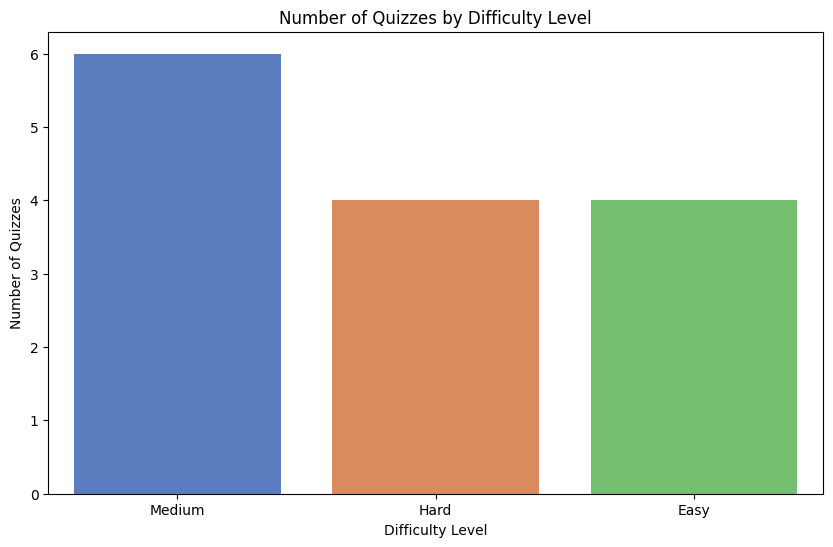

In [100]:
plt.figure(figsize=(10, 6))
quiz_count_by_difficulty = df['Difficulty Level'].value_counts().reset_index()
quiz_count_by_difficulty.columns = ['Difficulty Level', 'Quiz Count']
sns.barplot(data=quiz_count_by_difficulty, x='Difficulty Level', y='Quiz Count', palette='muted')
plt.title('Number of Quizzes by Difficulty Level')
plt.xlabel('Difficulty Level')
plt.ylabel('Number of Quizzes')
plt.show()

/var/folders/0g/500smmy13yz_pjttpcdxzp040000gn/T/ipykernel_78196/50664910.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


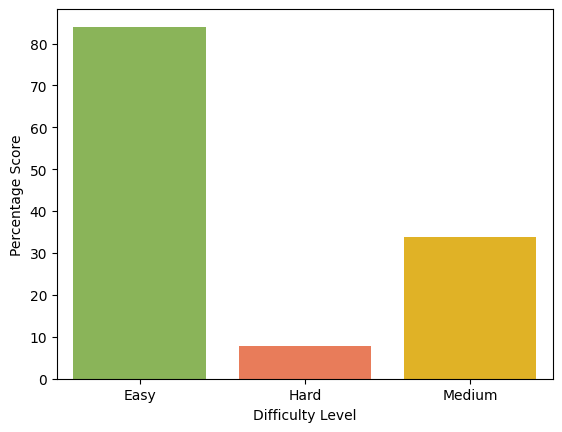

In [103]:
# Define colors for all unique difficulty levels
color_mapping = {
    'Easy': '#8BC34A',  # Green for Easy
    'Medium': '#FFC107',  # Yellow for Medium
    'Hard': '#FF7043'  # Red for Hard
}

# Ensure all unique difficulty levels in the data are in the mapping
difficulty_levels = df['Difficulty Level'].unique()
missing_levels = set(difficulty_levels) - set(color_mapping.keys())

# Add missing levels to the mapping (default to gray for safety)
for level in missing_levels:
    color_mapping[level] = '#B0BEC5'  # Light gray for undefined levels

# Reuse or update this color mapping in your bar plot
bars = sns.barplot(
    data=avg_percentage_by_difficulty,
    x='Difficulty Level',
    y='Percentage Score',
    palette=color_mapping  # Ensure all levels have assigned colors
)


/var/folders/0g/500smmy13yz_pjttpcdxzp040000gn/T/ipykernel_78196/1950474360.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_accuracy_by_difficulty, x='Difficulty Level', y='Accuracy', palette='coolwarm')


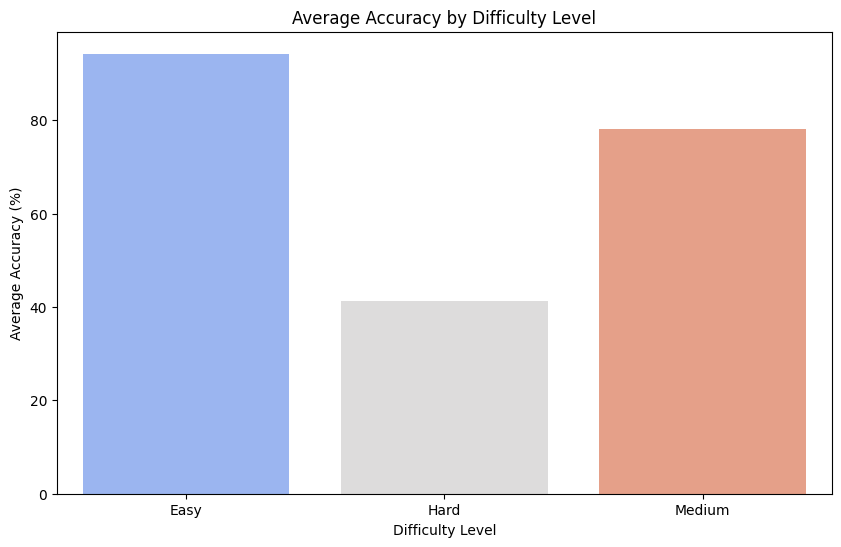

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure 'Accuracy' is numeric
df['Accuracy'] = df['Accuracy'].str.replace('%', '').astype(float)

# Group by Difficulty Level and calculate the average accuracy
avg_accuracy_by_difficulty = df.groupby('Difficulty Level', as_index=False)['Accuracy'].mean()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_accuracy_by_difficulty, x='Difficulty Level', y='Accuracy', palette='coolwarm')
plt.title('Average Accuracy by Difficulty Level')
plt.xlabel('Difficulty Level')
plt.ylabel('Average Accuracy (%)')
plt.show()


/var/folders/0g/500smmy13yz_pjttpcdxzp040000gn/T/ipykernel_78196/9206334.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df, x='Submission ID', y='Accuracy', marker='o', palette='coolwarm')


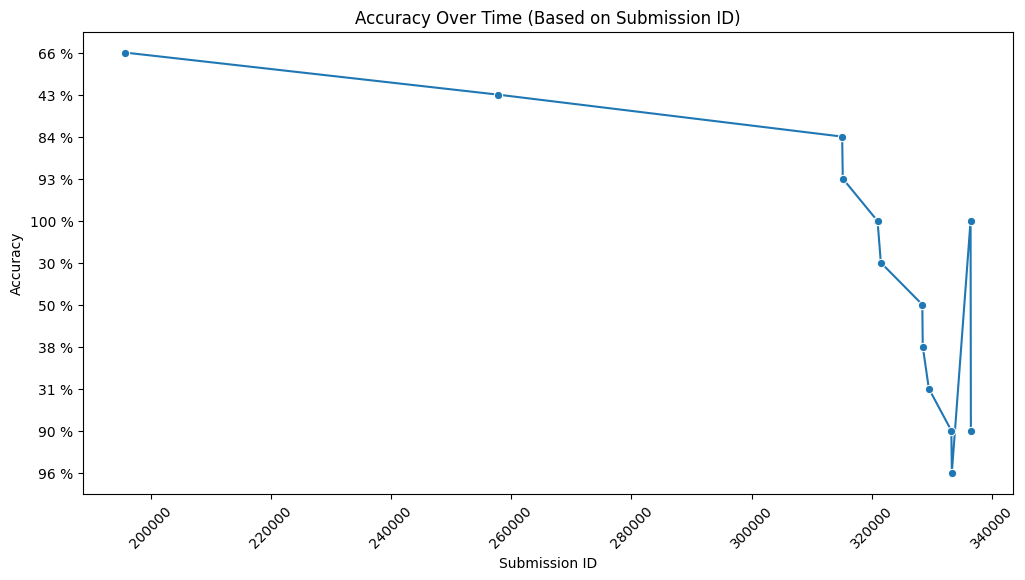

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the DataFrame `df` with 'Accuracy' and 'Submission ID' columns

# Sort the DataFrame by 'Submission ID' (ascending order)
df = df.sort_values('Submission ID')

# Plot accuracy over Submission ID
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Submission ID', y='Accuracy', marker='o', palette='coolwarm')
plt.title('Accuracy Over Time (Based on Submission ID)')
plt.xlabel('Submission ID')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()


/var/folders/0g/500smmy13yz_pjttpcdxzp040000gn/T/ipykernel_78196/1030807382.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Quiz Topic', y='Accuracy', palette='plasma')


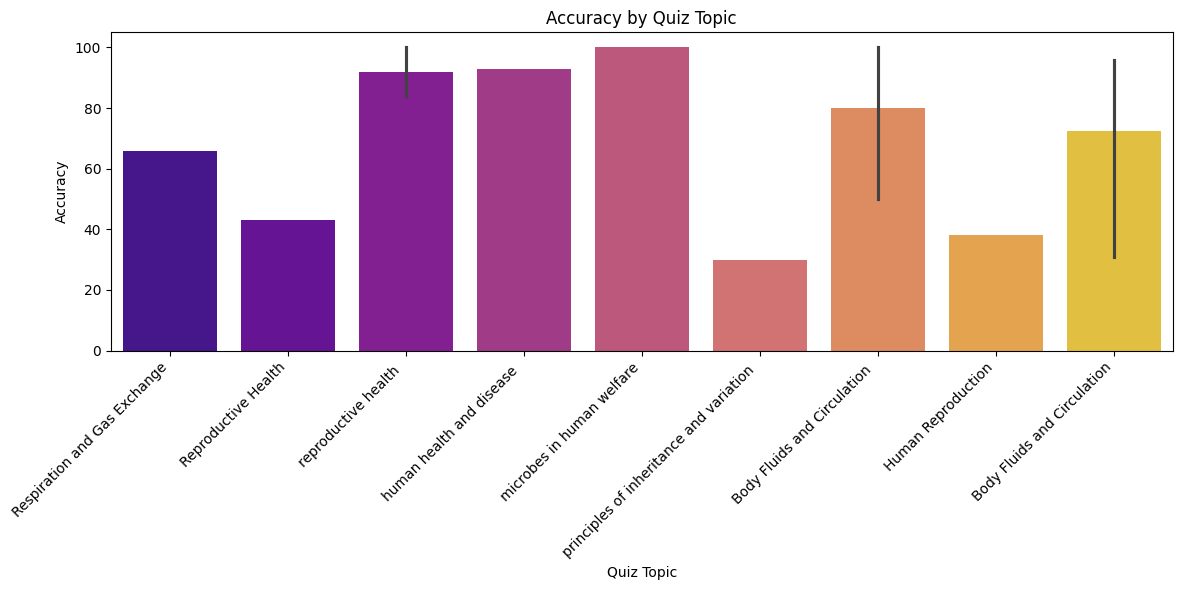

In [59]:
# 5. Visualize Accuracy by Topic
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Quiz Topic', y='Accuracy', palette='plasma')
plt.title('Accuracy by Quiz Topic')
plt.xlabel('Quiz Topic')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [76]:
import pandas as pd

# Load the DataFrame (assuming `df` is already loaded with relevant data)
df = pd.read_csv("quiz_submission_with_difficulty_level.csv")

# Ensure necessary conversions
df['Accuracy'] = df['Accuracy'].str.replace('%', '').astype(float)

# Insights Dictionary
insights = {}

# 1. Weak Areas
weak_areas = df.groupby('Quiz Topic').agg(
    avg_accuracy=('Accuracy', 'mean'),
    avg_negative_score=('Negative Score', 'mean'),
    avg_percentage_score=('Percentage Score', 'mean')
).reset_index()

weak_topics = weak_areas.sort_values(by=['avg_accuracy', 'avg_percentage_score'], ascending=True).head(3)
insights['Weak Topics'] = weak_topics

# 2. Improvement Trends
# Sort by Submission ID to analyze progress over time
df_sorted = df.sort_values('Submission ID')

# Accuracy Improvement
accuracy_trend = df_sorted[['Submission ID', 'Accuracy']]

# Percentage Score Improvement
percentage_trend = df_sorted[['Submission ID', 'Percentage Score']]


print("### Weak Areas ###")
print(weak_topics)

print("\n### Improvement Trends ###")
print("Accuracy Trend:\n", accuracy_trend)
print("Percentage Score Trend:\n", percentage_trend)

print("\n### Performance Gaps ###")
print(gaps_sorted)


### Weak Areas ###
                                 Quiz Topic  avg_accuracy  avg_negative_score  \
7  principles of inheritance and variation           30.0                 7.0   
2                        Human Reproduction          38.0                16.0   
3                       Reproductive Health          43.0                17.0   

   avg_percentage_score  
7              5.084746  
2             11.235955  
3             23.636364  

### Improvement Trends ###
Accuracy Trend:
     Submission ID  Accuracy
13         195808      66.0
12         257774      43.0
11         315081      84.0
10         315179      93.0
9          320916     100.0
8          320963     100.0
7          321514      30.0
6          328414      50.0
5          328488      38.0
4          329504      31.0
3          333242      90.0
2          333330      96.0
1          336448     100.0
0          336497      90.0
Percentage Score Trend:
     Submission ID  Percentage Score
13         195808         

/var/folders/0g/500smmy13yz_pjttpcdxzp040000gn/T/ipykernel_78196/681853402.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


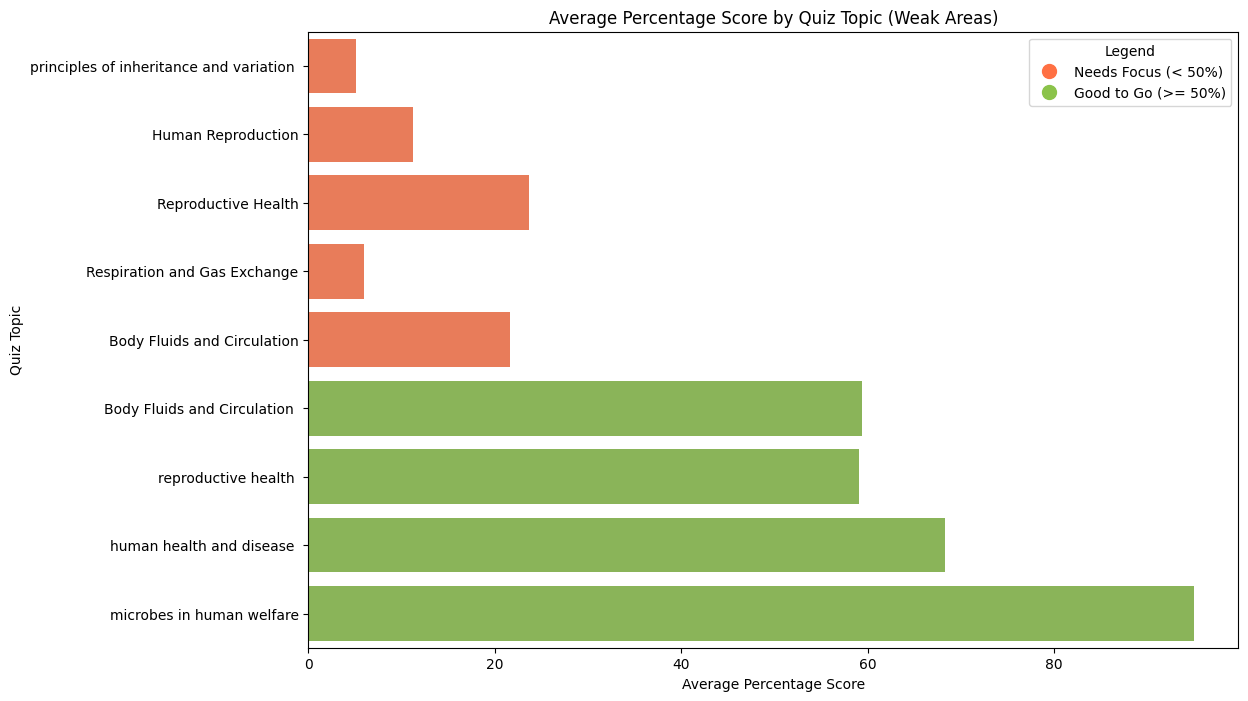

/var/folders/0g/500smmy13yz_pjttpcdxzp040000gn/T/ipykernel_78196/681853402.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


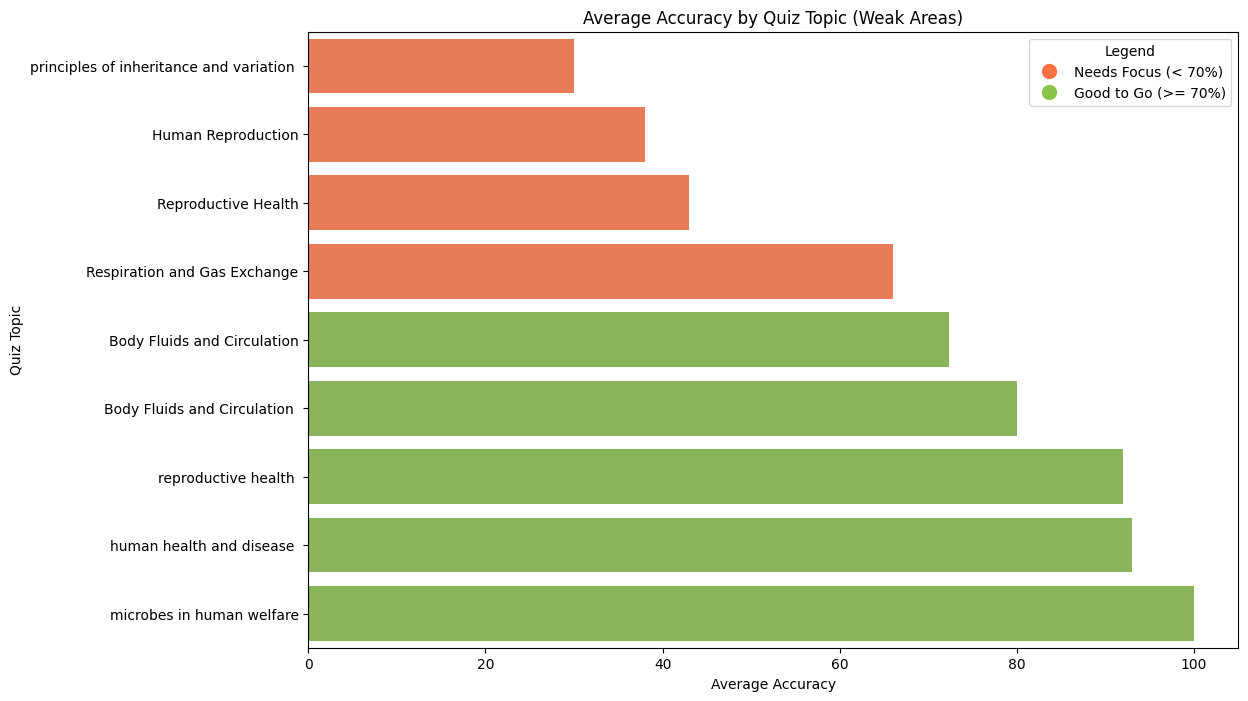

/var/folders/0g/500smmy13yz_pjttpcdxzp040000gn/T/ipykernel_78196/681853402.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


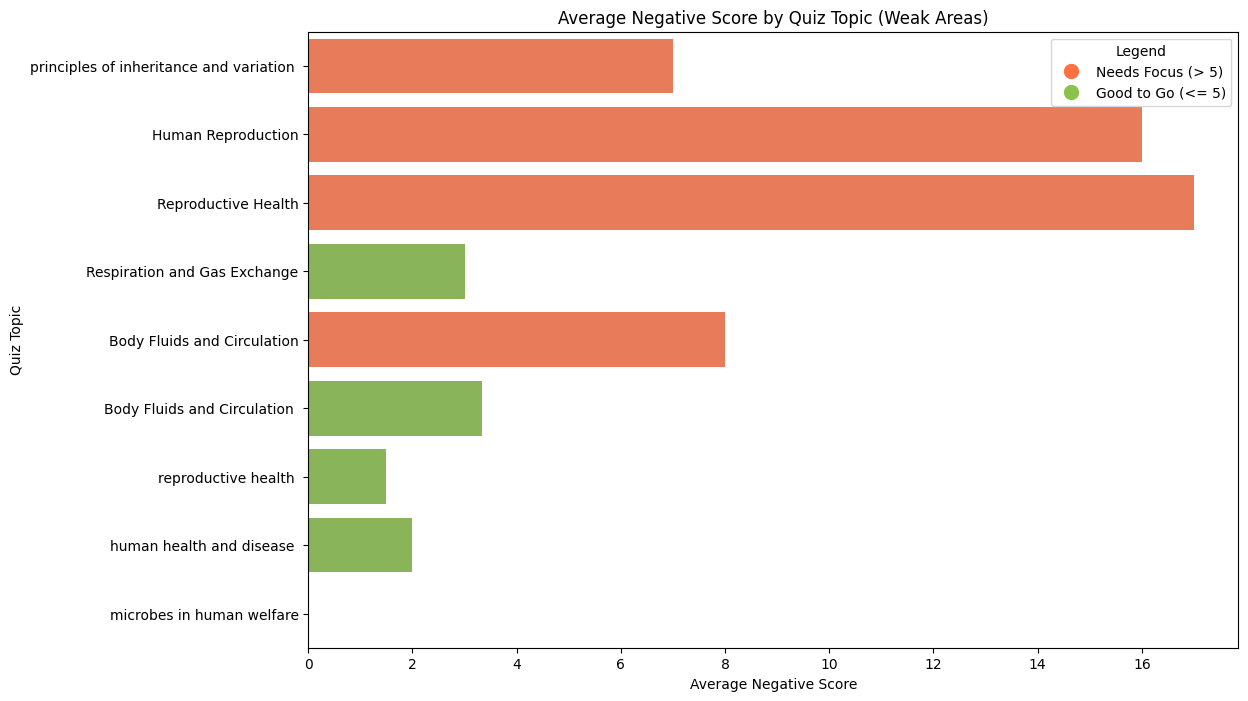

In [90]:
# Function to assign colors based on thresholds
def assign_colors(values, threshold, lower_color="#FF7043", higher_color="#8BC34A"):
    return [lower_color if value < threshold else higher_color for value in values]

# Update bar plots with lighter colors

# 1. Horizontal bar plot for average percentage score
colors_percentage = assign_colors(weak_areas_sorted['avg_percentage_score'], percentage_score_threshold)

plt.figure(figsize=(12, 8))
bars = sns.barplot(
    data=weak_areas_sorted,
    y='Quiz Topic',
    x='avg_percentage_score',
    palette=colors_percentage  # Use lighter colors here
)
plt.title('Average Percentage Score by Quiz Topic (Weak Areas)')
plt.xlabel('Average Percentage Score')
plt.ylabel('Quiz Topic')

# Add legend for percentage scores
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#FF7043', markeredgecolor='#FF7043', markersize=10, label='Needs Focus (< 50%)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#8BC34A', markeredgecolor='#8BC34A', markersize=10, label='Good to Go (>= 50%)')
], loc='upper right', title="Legend")
plt.show()

# 2. Horizontal bar plot for average accuracy
colors_accuracy = assign_colors(weak_areas_sorted['avg_accuracy'], accuracy_threshold)

plt.figure(figsize=(12, 8))
bars = sns.barplot(
    data=weak_areas_sorted,
    y='Quiz Topic',
    x='avg_accuracy',
    palette=colors_accuracy  # Use lighter colors here
)
plt.title('Average Accuracy by Quiz Topic (Weak Areas)')
plt.xlabel('Average Accuracy')
plt.ylabel('Quiz Topic')

# Add legend for accuracy
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#FF7043', markeredgecolor='#FF7043', markersize=10, label='Needs Focus (< 70%)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#8BC34A', markeredgecolor='#8BC34A', markersize=10, label='Good to Go (>= 70%)')
], loc='upper right', title="Legend")
plt.show()

# 3. Horizontal bar plot for average negative score
colors_negative = assign_colors(weak_areas_sorted['avg_negative_score'], 5, lower_color="#8BC34A", higher_color="#FF7043")

plt.figure(figsize=(12, 8))
bars = sns.barplot(
    data=weak_areas_sorted,
    y='Quiz Topic',
    x='avg_negative_score',
    palette=colors_negative  # Use lighter colors here
)
plt.title('Average Negative Score by Quiz Topic (Weak Areas)')
plt.xlabel('Average Negative Score')
plt.ylabel('Quiz Topic')

# Add legend for negative scores
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#FF7043', markeredgecolor='#FF7043', markersize=10, label='Needs Focus (> 5)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#8BC34A', markeredgecolor='#8BC34A', markersize=10, label='Good to Go (<= 5)')
], loc='upper right', title="Legend")
plt.show()


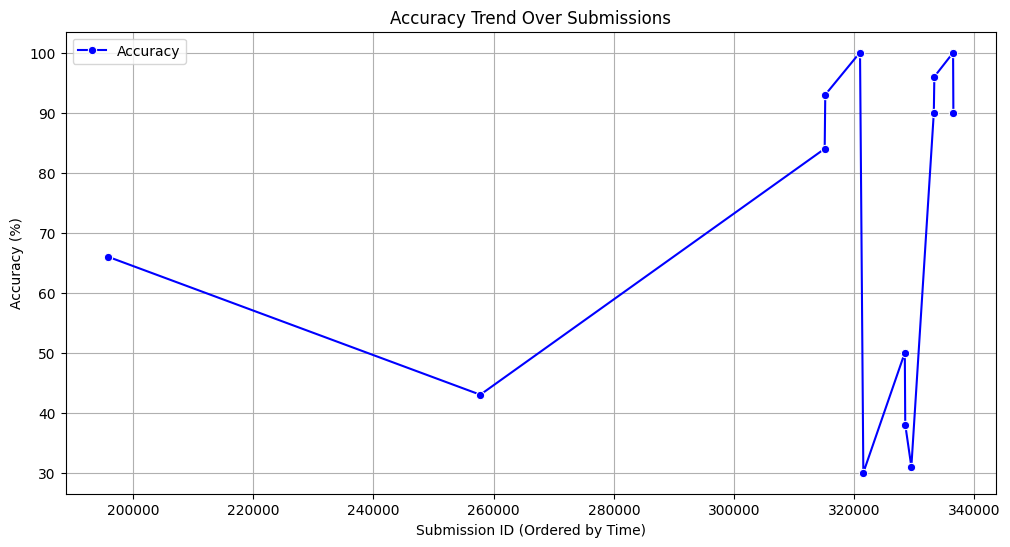

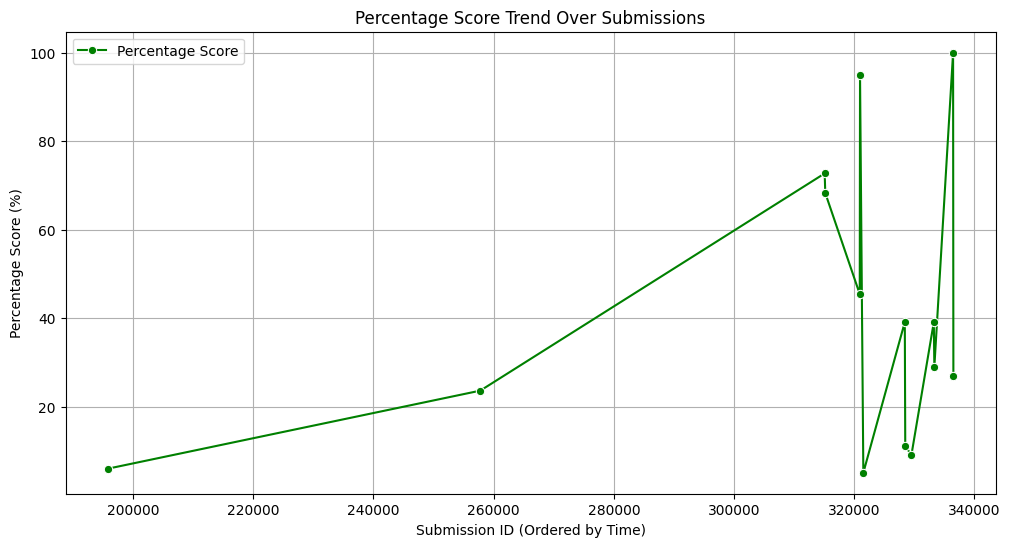

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Accuracy Trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=accuracy_trend, x='Submission ID', y='Accuracy', marker='o', color='blue', label='Accuracy')
plt.title('Accuracy Trend Over Submissions')
plt.xlabel('Submission ID (Ordered by Time)')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.legend()
plt.show()

# 2. Percentage Score Trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=percentage_trend, x='Submission ID', y='Percentage Score', marker='o', color='green', label='Percentage Score')
plt.title('Percentage Score Trend Over Submissions')
plt.xlabel('Submission ID (Ordered by Time)')
plt.ylabel('Percentage Score (%)')
plt.grid(True)
plt.legend()
plt.show()


/var/folders/0g/500smmy13yz_pjttpcdxzp040000gn/T/ipykernel_2820/4002876096.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=performance_gaps, y='Quiz Topic', x='avg_rank_gap', palette='coolwarm')


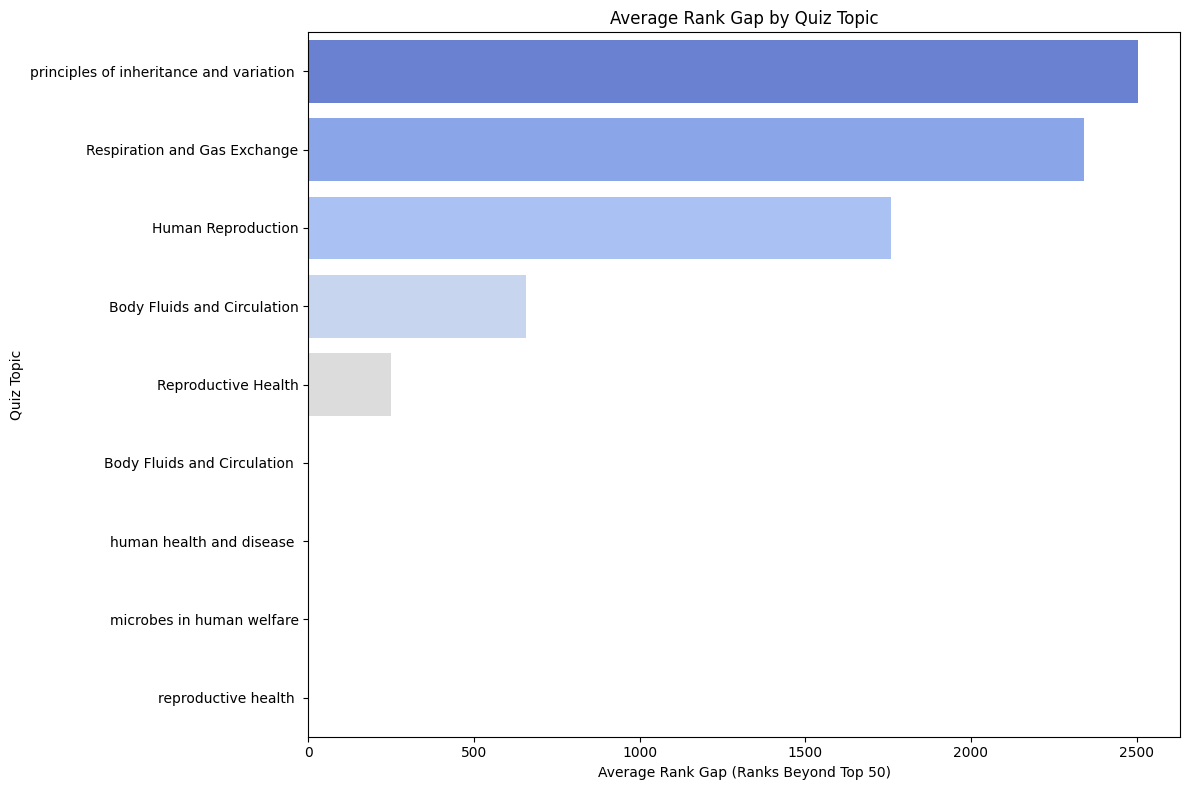

/var/folders/0g/500smmy13yz_pjttpcdxzp040000gn/T/ipykernel_2820/4002876096.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=performance_gaps, y='Quiz Topic', x='avg_score_gap', palette='viridis')


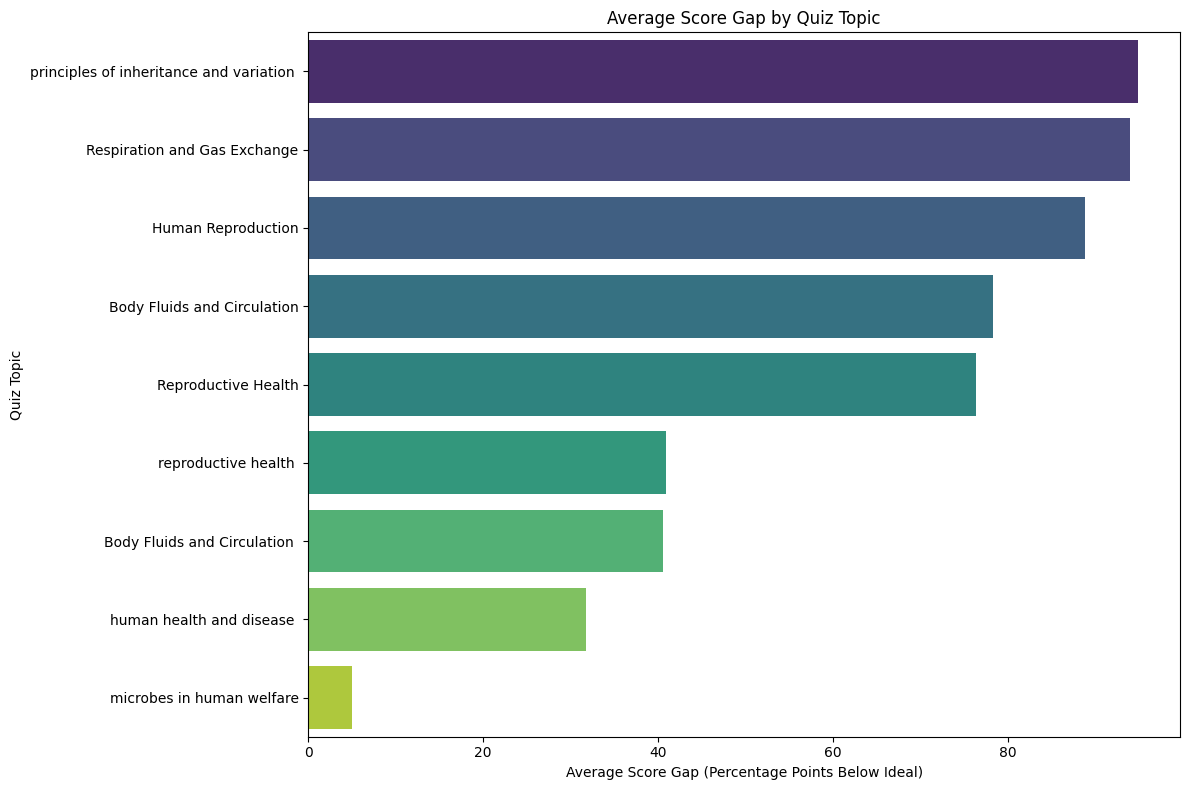

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("quiz_submission_with_difficulty_level.csv")

# Extract rank from 'Rank Text' and calculate Rank-Based Gap
df['Rank'] = df['Rank Text'].str.extract(r'#(-?\d+)').astype(float)  # Extract numeric rank
df['Rank Gap'] = df['Rank'].apply(lambda rank: max(0, rank - 50))  # Gap from the top 50 ranks

# Calculate Score-Based Gap
ideal_score = 100  # Ideal percentage score
df['Score Gap'] = ideal_score - df['Percentage Score']

# Aggregate performance gaps by topic
performance_gaps = df.groupby('Quiz Topic').agg(
    avg_rank_gap=('Rank Gap', 'mean'),
    avg_score_gap=('Score Gap', 'mean')
).reset_index()

# Sort topics by Rank Gap for visualization
performance_gaps = performance_gaps.sort_values(by='avg_rank_gap', ascending=False)

# Visualization: Rank-Based Gap
plt.figure(figsize=(12, 8))
sns.barplot(data=performance_gaps, y='Quiz Topic', x='avg_rank_gap', palette='coolwarm')
plt.title('Average Rank Gap by Quiz Topic')
plt.xlabel('Average Rank Gap (Ranks Beyond Top 50)')
plt.ylabel('Quiz Topic')
plt.tight_layout()
plt.show()

# Visualization: Score-Based Gap
performance_gaps = performance_gaps.sort_values(by='avg_score_gap', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=performance_gaps, y='Quiz Topic', x='avg_score_gap', palette='viridis')
plt.title('Average Score Gap by Quiz Topic')
plt.xlabel('Average Score Gap (Percentage Points Below Ideal)')
plt.ylabel('Quiz Topic')
plt.tight_layout()
plt.show()


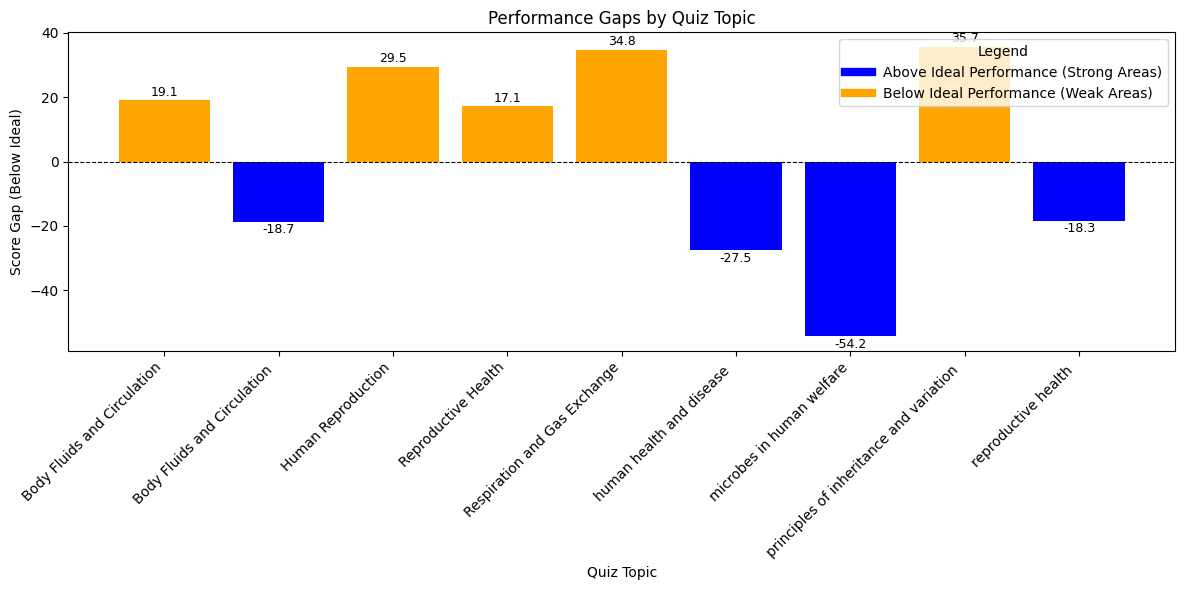

Student Persona Analysis:


KeyError: "Column(s) ['Option Text', 'Question Description'] do not exist"

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("quiz_submission_with_difficulty_level.csv")

# Preprocess the Rank Text column to extract numerical values
df['Rank'] = df['Rank Text'].str.extract(r'#(-?\d+)').astype(float)

df['Rank'] = df['Rank'].abs()

# Define ideal benchmarks
ideal_rank = 50
ideal_avg_score = df['Percentage Score'].mean()

# Calculate strengths and weaknesses
df['Rank Below Ideal'] = df['Rank'] - ideal_rank
df['Avg Score Below Ideal'] = ideal_avg_score - df['Percentage Score']

# Aggregated performance per topic
performance_by_topic = df.groupby('Quiz Topic').agg(
    avg_rank=('Rank', 'mean'),
    avg_score=('Percentage Score', 'mean'),
    rank_gap=('Rank Below Ideal', 'mean'),
    score_gap=('Avg Score Below Ideal', 'mean')
).reset_index()

# Assign personas
def assign_persona(row):
    if row['avg_rank'] <= 30 and row['avg_score'] >= ideal_avg_score:
        return "Quiz Ace"
    elif row['rank_gap'] < 0 and row['score_gap'] > 0:
        return "Potential Challenger"
    elif row['score_gap'] > 0 and row['rank_gap'] > 0:
        return "Focus Needed"
    else:
        return "Topic Explorer"

performance_by_topic['Persona'] = performance_by_topic.apply(assign_persona, axis=1)

# Visualization
plt.figure(figsize=(12, 6))

# Assign unique colors for each bar
colors = ['blue' if score_gap < 0 else 'orange' for score_gap in performance_by_topic['score_gap']]

# Bar chart for score gaps
bars = plt.bar(performance_by_topic['Quiz Topic'], performance_by_topic['score_gap'], color=colors)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.title('Performance Gaps by Quiz Topic')
plt.ylabel('Score Gap (Below Ideal)')
plt.xlabel('Quiz Topic')

# Rotate x-axis labels and avoid overlap
plt.xticks(rotation=45, ha='right')

# Add numerical labels to bars for clarity
for i, score_gap in enumerate(performance_by_topic['score_gap']):
    plt.text(i, score_gap + (0.5 if score_gap >= 0 else -0.5), f"{score_gap:.1f}", 
             ha='center', va='bottom' if score_gap >= 0 else 'top', fontsize=9)

# Add legend
plt.legend(
    handles=[
        plt.Line2D([0], [0], color='blue', lw=6, label='Above Ideal Performance (Strong Areas)'),
        plt.Line2D([0], [0], color='orange', lw=6, label='Below Ideal Performance (Weak Areas)')
    ],
    loc='upper right',
    fontsize=10,
    title='Legend'
)

plt.tight_layout()
plt.show()

# Display personas
print("Student Persona Analysis:")
print(performance_by_topic[['Quiz Topic', 'avg_rank', 'avg_score', 'Persona']])
